In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons,make_circles,make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

D:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
D:\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


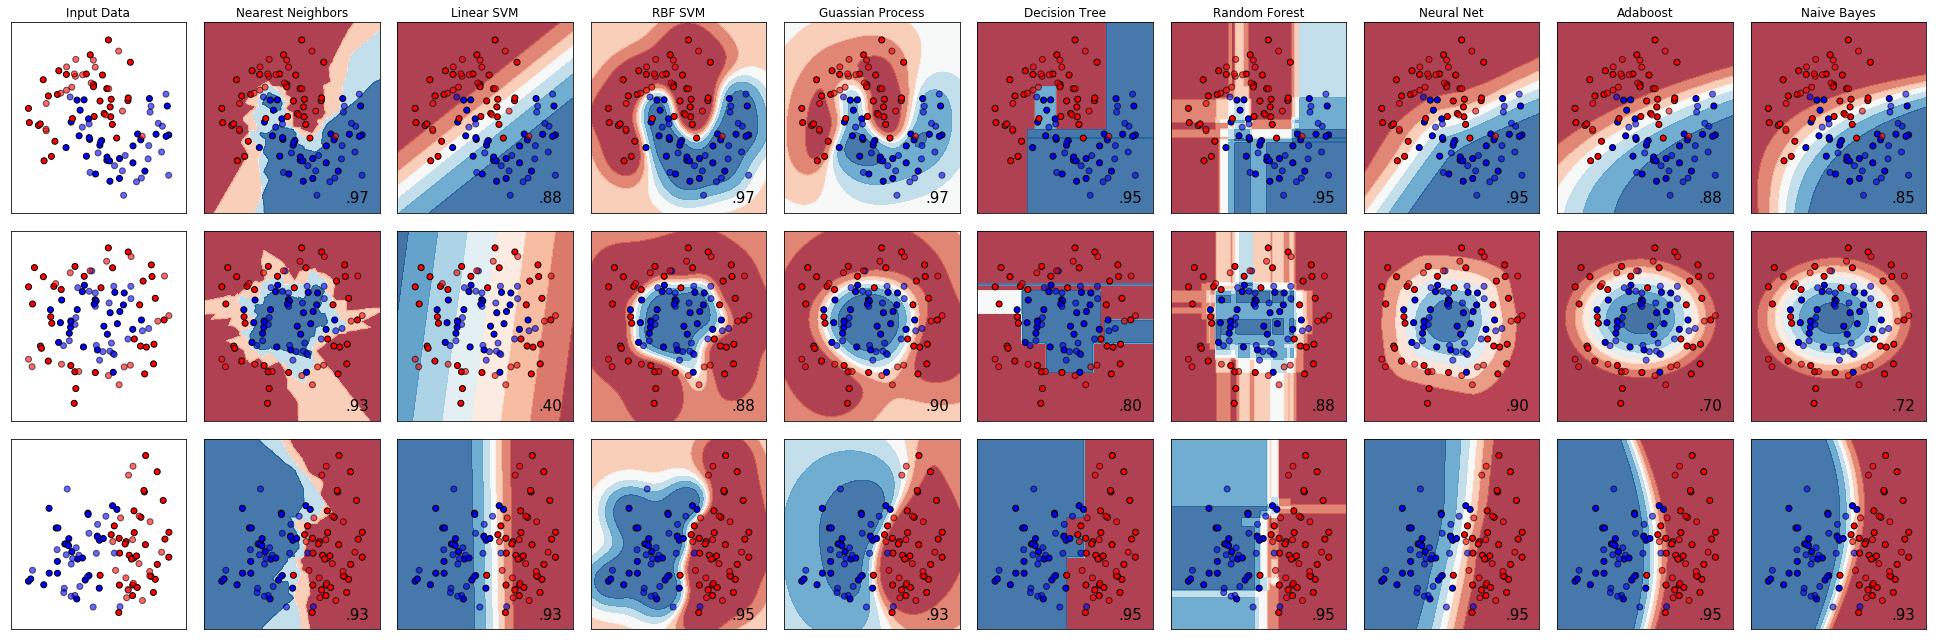

In [33]:
h=.02
names=['Nearest Neighbors','Linear SVM','RBF SVM',
       'Guassian Process','Decision Tree','Random Forest',
       'Neural Net','Adaboost','Naive Bayes','QDA']

classifiers=[
    KNeighborsClassifier(3),
    SVC(kernel='linear',C=0.025,probability=True),
    SVC(gamma=2,C=1,probability=True),
    GaussianProcessClassifier(1.0*RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5,n_estimators=10,max_features=1),
    MLPClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()
]

x,y=make_classification(n_features=2,n_redundant=0,n_informative=2,
                       random_state=1,n_clusters_per_class=1)

rng=np.random.RandomState(2)

x+=2*rng.uniform(size=x.shape)

linearly_separable=(x,y)


datasets=[make_moons(noise=0.3,random_state=0),
          make_circles(noise=0.2,factor=0.5,random_state=1),
          linearly_separable]

figure=plt.figure(figsize=(27,9))
i=1
for ds_cnt,ds in enumerate(datasets):
    x,y=ds
    x=StandardScaler().fit_transform(x)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,
                                                   random_state=42)
    x_min,x_max=x[:,0].min()-0.5,x[:,0].max()+0.5
    y_min,y_max=x[:,1].min()-0.5,x[:,1].max()+0.5
    xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
    
    cm=plt.cm.RdBu
    cm_bright=ListedColormap(['#FF0000', '#0000FF'])
    ax=plt.subplot(len(datasets),len(classifiers)+1,i)
    if ds_cnt==0:
        ax.set_title('Input Data')
    ax.scatter(x_train[:,0],x_train[:,1],c=y_train,cmap=cm_bright,
              edgecolors='k')
    ax.scatter(x_test[:,0],x_test[:,1],c=y_test,cmap=cm_bright,alpha=0.6,edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1
    
    for name,clf in zip(names,classifiers):
        ax=plt.subplot(len(datasets),len(classifiers)+1,i)
        clf.fit(x_train,y_train)
        score=clf.score(x_test,y_test)
        
        if hasattr(clf,'decision_funnction'):
            z=clf.decision_function(np.c_[xx.ravel(),yy.ravel()])
        else:
            z=clf.predict_proba(np.c_[xx.ravel(),yy.ravel()])[:,1]
            
        z=z.reshape(xx.shape)
        ax.contourf(xx,yy,z,cmap=cm,alpha=.8)
        
        ax.scatter(x_train[:,0],x_train[:,1],c=y_train,cmap=cm_bright,edgecolors='k')
        ax.scatter(x_test[:,0],x_test[:,1],c=y_test,cmap=cm_bright,edgecolors='k',
                  alpha=0.6)
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1
        
plt.tight_layout()
plt.show()
        